In [1]:
import torchaudio
import noisereduce as nr
# from torchaudio.functional import *
import torch as tr
import matplotlib.pyplot as plt

C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x1, sr = torchaudio.load('../normalized/sensor_1.wav')
x2, sr = torchaudio.load('../normalized/sensor_2.wav')
x3, sr = torchaudio.load('../normalized/sensor_3.wav')
X = tr.concat([x1, x2, x3], dim=0)

N = len(x1[0])
n = 3
tt = tr.arange(N) / sr
ii = tr.linspace(0, N, n, dtype=tr.int32)

In [3]:
def long_or(a, w):
    y = tr.zeros(a.shape)
    for i in range(w, a.shape[0]-w):
        y[i] = True in a[i-w:i+w]
    return y

([], [])

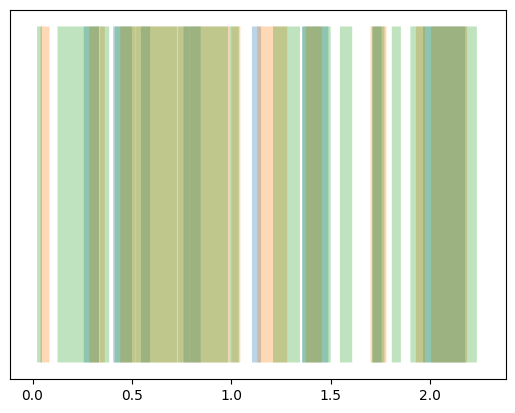

In [4]:
# AMPLITUDE CLASSIFIER

for x in X: # for each sensor
    E = tr.sqrt(tr.mean(x**2)) # Calculate a relative threshold
    c = tr.abs(x[:100000]) > E * 2
    c_trim = c
    c_trim = long_or(c_trim, 1000) # expand acceptance bands
    plt.fill_between(tt[:100000], c_trim, alpha=.3)
plt.yticks([])

# Each colour is a sensor going above 2 times it's rms

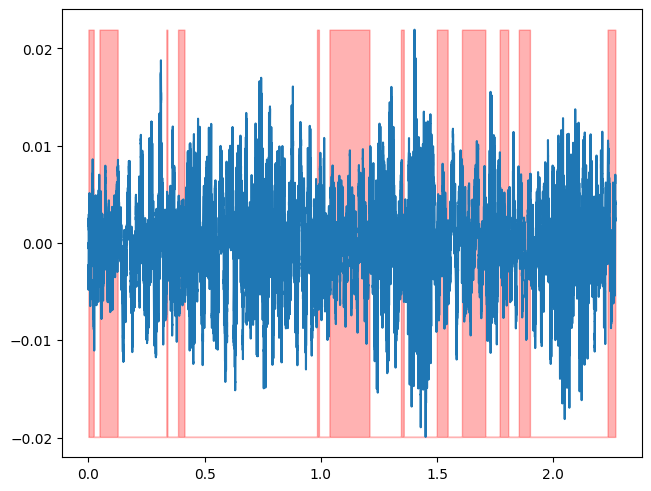

In [7]:
fig, ax = plt.subplots(layout='constrained')

# Example of binary filtering by volume
x_trim = x3[0, :100000]
ax.plot(tt[:100000], x_trim * c_trim)

x_range = tr.max(x_trim) - tr.min(x_trim)

ax.fill_between(tt[:100000], c_trim * x_range + tr.min(x_trim), tr.min(x_trim), color='r', alpha=.3)